# Problem 1

## Problem Description
In this problem you will use DBSCAN to cluster two melt pool images from a powder bed fusion metal 3D printer. Often times during printing there can be spatter around the main melt pool, which is undesirable. If we can successfully train a model to identify images with large amounts of spatter, we can automatically monitor the printing process.

Fill out the notebook as instructed, making the requested plots and printing necessary values. 

*You are welcome to use any of the code provided in the lecture activities.*

#### Summary of deliverables:

- Bitmap visualization of melt pool images 1 and 2
- Visualization of final DBSCAN clustering result for both melt pool images
- Discussion of tuning, final number of clusters, and the sensitivity of the model parameters for the two images.

#### Imports and Utility Functions:

In [209]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.cluster import DBSCAN

def points_to_bitmap(x):
    bitmap = np.zeros((64, 64), dtype=int)
    cols, rows = x[:, 0], x[:, 1]
    bitmap[rows, cols] = 1
    return bitmap

def plot_bitmap(bitmap):
    _, ax = plt.subplots(figsize=(3,3), dpi = 200)
    colors = ListedColormap(['black', 'white'])
    ax.imshow(bitmap, cmap = colors, origin = 'lower')
    ax.axis('off')

def plot_points(x, labels):
    fig = plt.figure(figsize = (5,4), dpi = 150)
    for i in range(min(labels),max(labels)+1):
        plt.scatter(x[labels == i, 0], x[labels == i, 1], alpha = 0.5, marker = 's')
    plt.gca().set_aspect('equal')
    plt.tight_layout()
    plt.show()

## Melt Pool Image #1

Load the first meltpool scan from the `m11-hw1-data1.txt` file using `np.loadtxt()`, and pass the `dtype = int` argument to ensure all values are loaded with their integer coordinates. You can convert these points to a binary bitmap using the provided `points_to_bitmap()` function, and then visualize the image using the provided `plot_bitmap()` function. 

Note: you will use the integer coordinates for clustering, the bitmap is just for visualizing the data.

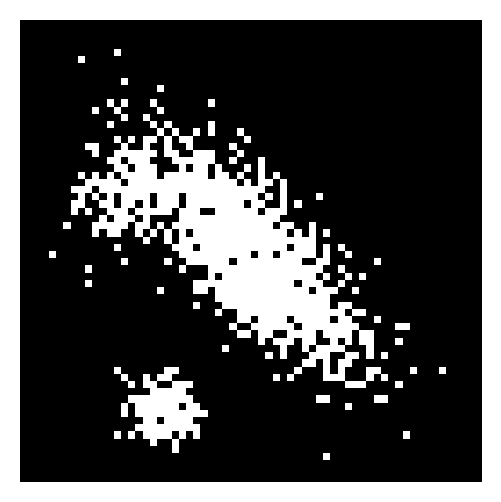

In [210]:
## YOUR CODE GOES HERE
# load the given data
data = np.loadtxt("data/m11-hw1-data1.txt", dtype=int)
bitmap = points_to_bitmap(data)
plot_bitmap(bitmap)

Using the `sklearn.cluster.DBSCAN()` function, cluster the melt pool until you get well defined clusters. You will have to modify the `eps` and `min_samples` parameters to get satisfactory results. You can visualize the clustering with the provided `plot_points(x, labels)` function, where `x` is the integer coordinates of all the points, and labels are the labels assigned by `DBSCAN`. Plot the results of your final clustering using the `plot_points()` function

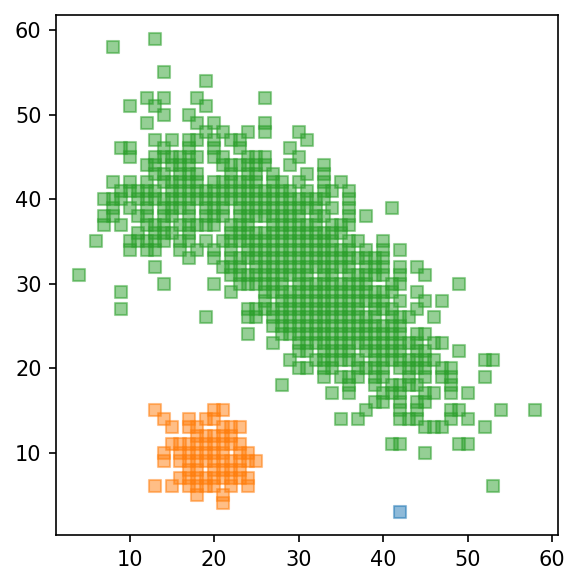

In [211]:
## YOUR CODE GOES HERE
# cluster the data using DBSCAN
dbscan = DBSCAN(eps=7, min_samples=3)
labels = dbscan.fit_predict(data)
plot_points(data, labels)

## Melt Pool Image #2

Now load the second melt pool scan from the `m11-hw1-data2.txt` file using `np.loadtxt()`, and the `dtype = int` argument to ensure all values are loaded with their integer coordinates. Again, convert the points to a binary bitmap, and visualize the bitmap using the provided functions.

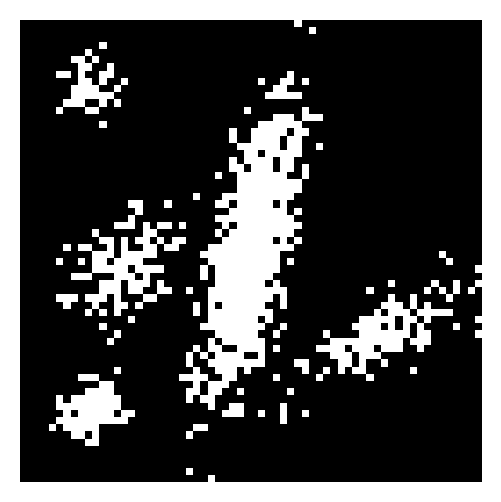

In [212]:
## YOUR CODE GOES HERE
# load the given data
data = np.loadtxt("data/m11-hw1-data2.txt", dtype=int)
bitmap = points_to_bitmap(data)
plot_bitmap(bitmap)

Using the `sklearn.cluster.DBSCAN()` function, cluster the meltpool until you get well defined clusters. You will have to modify the `eps` and `min_samples` parameters to get satisfactory results. You can visualize the clustering with the provided `plot_points(x, labels)` function, where `x` is the integer coordinates of all the points, and labels are the labels assigned by `DBSCAN`. Plot the results of your final clustering using the `plot_points()` function.

Note: this melt pool is significantly noisier than the last and therefore requires more sensitive tuning of the two DBSCAN parameters.

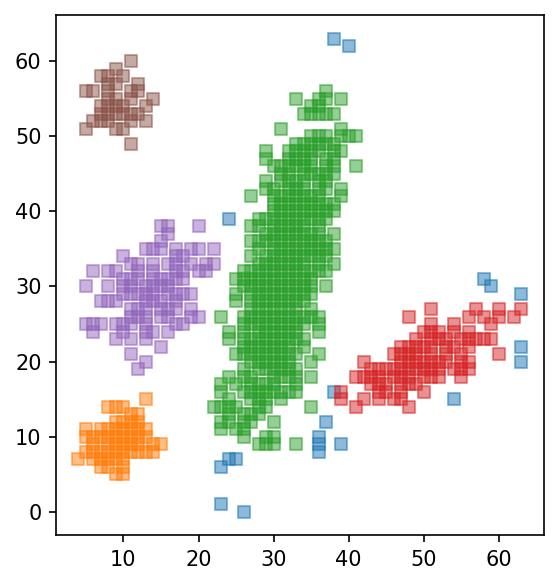

In [213]:
## YOUR CODE GOES HERE
# cluster the data using DBSCAN
dbscan = DBSCAN(eps=3, min_samples=6)
labels = dbscan.fit_predict(data)
plot_points(data, labels)

## Discussion

Discuss how you tuned the `eps` and `min_samples` parameters for the two models. How many clusters did you end up finding in each image? Why does a wider range of `eps` and `min_samples` values successfully cluster melt pool image #1 compared to melt pool image #2?

I used the trial-and-error method when tuning the eps and min_samples parameters. 

For image number 1, the eps is set to 7 and the min_sample is set to 3. The model identified 3 clusters but I believe the ground truth should be only 2 clusters with blue points being false classification. 

For image number 2, the eps is set to 3 and the min_sample is set to 6. The model identified 6 clusters but I believe the ground truth should be only 5 with blue points being false classification. 

A wider range of EPS and min_samples values can successfully classify clusters for image number 1 compared to image number 2. This is because the given ground truth dataset for image 1 has more distance cluster characteristics with less overlapping, which gives more flexibility in parameter tuning. On the other hand, the ground truth dataset for image 2 is more complete with more closely distributed clusters, which requires a more definite parameter declaration.